In [ ]:
!nvidia-smi -L

/bin/bash: nvidia-smi: command not found


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
! wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-06-30 15:46:48--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-06-30 15:46:48 (69.5 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import walk_through_dir, unzip_data

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2023-06-30 15:46:50--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.111.128, 142.251.163.128, 142.251.167.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.008s  

2023-06-30 15:46:50 (72.7 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [ ]:
unzip_data('nlp_getting_started.zip')

In [ ]:
## Visualize the data

!head -2 train.csv

id,keyword,location,text,target
1,,,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1


In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
#shuffle train data
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [ ]:
# What does the test data looks like?
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

the data look kind of balanced here

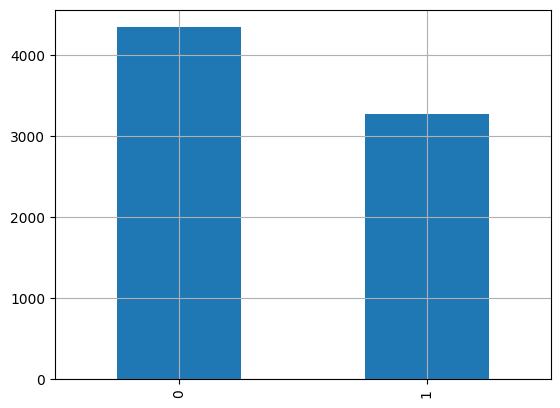

In [ ]:
train_df.target.value_counts().plot(kind='bar', grid=True)
plt.show()

In [ ]:
## number of samples
len(train_df), len(test_df)

(7613, 3263)

In [ ]:
#lets visualize some random training examples
import random
random_index = random.randint(0, len(train_df)-5)
for row in train_df_shuffled[['text', 'target']][random_index:random_index+5].itertuples():
    _, text, target = row
    print(f"Target: {target}", "(real disaster)" if target >0 else "(not a real disaster)")
    print(f"Text:\n{text}")
    print()

Target: 0 (not a real disaster)
Text:
Pakistan Supreme Court OKs Military Courts to Try Civilians: The Supreme Court ruling would empower the milita... http://t.co/v0nf1Uc1OW

Target: 0 (not a real disaster)
Text:
contemplating going to chilis just to get a molten lava cake ....??

Target: 0 (not a real disaster)
Text:
@TroySlaby22 slicker than an oil spill

Target: 0 (not a real disaster)
Text:
She's kinda hot played on the radio today. What's next? Disease to all? The apocalypse has started everyone. Be careful.

Target: 0 (not a real disaster)
Text:
So now that Di Maria has left my dear #mufc  back to the Hazard-Di Maria argument.... I'd say Hazard is way better ?? idc



##Train and validation dataset

In [ ]:
from sklearn.model_selection import train_test_split



In [ ]:
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled['text'].to_numpy(),
                                                                            train_df_shuffled['target'].to_numpy(),
                                                                            test_size=0.1,
                                                                            random_state=42)

In [ ]:
len(train_sentences), len(val_sentences), len(train_labels), len(val_labels)

(6851, 762, 6851, 762)

In [ ]:
train_sentences.shape

(6851,)

In [ ]:
type(train_sentences)

numpy.ndarray

In [ ]:
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

## Convert text to numbers - Vectorization

There aretwo ways to do these.(important NLP terminologies):
 - tokenization (is kind of static doesn't ge update as neural network learns patterns)
    - direct mapping to a number(character level tokenization, word level tokenization)
    - one hot encoding
 - embedding - richer representation of relationship between tokens(advantages: you can limit size and can be learned)
    - create you own embedding
    - use a prelearned pretraining

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [ ]:
text_vectorizer = TextVectorization(max_tokens=None,
                                    standardize='lower_and_strip_punctuation',
                                    split='whitespace',
                                    ngrams=None,
                                    output_mode='int',
                                    output_sequence_length=None,)
                                    #pad_to_max_tokens=True)

In [ ]:
# FInd the average number of tokensin the training tweet
round(sum([len(s.split())for s in train_sentences]) / len(train_sentences))

15

In [ ]:
max_vocab_length = 10000
max_length =15

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode='int',
                                    output_sequence_length=max_length,)

In [ ]:
# Fit the text vectorizer
text_vectorizer.adapt(train_sentences)

In [ ]:
# look at a sample
sample_sentence = "Hello i am doing great!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[1400,    8,  160,  487,  196,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0]])>

In [ ]:
import random

In [ ]:
# Choose a random sentence from train dat and vestorize it and check it
random_sentence = random.choice(train_sentences)
text_vectorizer([random_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 854,    4, 1021, 1223, 1413,  444,  247,  225,   11,  432,  419,
        1409,  307,  128,  854]])>

In [ ]:
# Get the unique words in vocab
words_in_vocab = text_vectorizer.get_vocabulary()

In [ ]:
top_5_words = words_in_vocab[:5]
bottom_5_words = words_in_vocab[-5:]

In [ ]:
print("Number of words in vocab:", len(words_in_vocab))
print("top_5_words:\n",top_5_words)
print("bottom_5_words:\n",bottom_5_words)

Number of words in vocab: 10000
top_5_words:
 ['', '[UNK]', 'the', 'a', 'in']
bottom_5_words:
 ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


## Creating an Embedding using EMbedding layer

Parameters:
- input_dim
- output_dim
- input_length


In [ ]:
from tensorflow.keras.layers import Embedding

In [ ]:
embedding = Embedding(input_dim=max_vocab_length,
                      output_dim=128,
                      embeddings_initializer='uniform',
                      input_length=max_length)

In [ ]:
embedding

In [ ]:
# Get a random sentence from train_data
random_sentence = random.choice(train_sentences)
print(f'Original Text:\n{random_sentence}\n')

# Embed  - turns positive integer into dense vector of fixed size
print('Embedded version:')
embeded = embedding(text_vectorizer([random_sentence]))
print(embeded.shape)
print(embeded)

Original Text:
Heavy smoke pouring out of buildings on fire in Port Coquitlam http://t.co/GeqkdaO4cV http://t.co/Dg0bGzeCgM

Embedded version:
(1, 15, 128)
tf.Tensor(
[[[-0.0195331   0.01895671 -0.04351706 ...  0.02370605  0.0062605
   -0.02700156]
  [-0.01801886  0.01951278  0.01064389 ... -0.01425347 -0.04983569
    0.01353934]
  [ 0.00824774 -0.02195854 -0.04619578 ...  0.02685689 -0.01037102
   -0.04541106]
  ...
  [ 0.04497076 -0.02686685  0.04717529 ...  0.04045615  0.02792071
   -0.00329654]
  [-0.0481836  -0.00222485 -0.03340379 ...  0.02087159 -0.04535779
    0.01941855]
  [-0.0481836  -0.00222485 -0.03340379 ...  0.02087159 -0.04535779
    0.01941855]]], shape=(1, 15, 128), dtype=float32)


In [ ]:
# lets look at embedding for the first word in our text
print(f'Original Text:\n{random_sentence}\n')
print(f"Embedding for the first word:\n{embeded[0][0]}")

Original Text:
Heavy smoke pouring out of buildings on fire in Port Coquitlam http://t.co/GeqkdaO4cV http://t.co/Dg0bGzeCgM

Embedding for the first word:
[-0.0195331   0.01895671 -0.04351706  0.00613825 -0.04965438  0.00281902
  0.03370977 -0.04369847  0.03338934  0.04490146 -0.03115704  0.02869599
 -0.0345398   0.01020789  0.02677058 -0.02602984  0.01509095 -0.02735008
  0.00683509 -0.01375705  0.01743582  0.0309775  -0.00513625 -0.04972768
 -0.04270805 -0.03403153  0.0249398   0.0125595   0.04911121  0.04907084
 -0.00011189 -0.02615559 -0.0191029   0.01614613 -0.01274778  0.01123769
 -0.04395554 -0.03593093 -0.03349274 -0.01174269  0.04734483  0.01877001
  0.00452045 -0.04888057  0.00314883  0.04237357 -0.04781142 -0.00176419
 -0.02621285  0.04939741  0.04159414 -0.00313096 -0.01810171  0.03613586
  0.04712704  0.0086487   0.00627066  0.03425558  0.02917895  0.03053507
  0.01030407 -0.03020548  0.03151203 -0.04081837  0.01797683 -0.01181968
  0.01807726  0.03463076  0.04698885 -0.03

# Modelling Experiments

- Model 0: Naive Bayes (Baseline)
- Model 1: Feed Forward Neural Network
- Model 2: LSTM
- Model 3: GRU
- Model 4: BidriectionalLSTMs
- Model 5: 1D Convolution Neural Network
- Model 6: Tensorflow Hub  Pretrained Feature Extractor
- Model 7: Same as model 6 with 10% of train data

##Model 0: NaiveBayes (Baseline)

To create  our baseline we will use skleran multinomial Naive Bayes using tfidf formula to convert our text into numbers. its common practice to use non-DL alogorithm as baseline beacuse of their speed and then later using DL if we can improve upon them

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
                ('tfidf', TfidfVectorizer()),
                ('clf', MultinomialNB())
])

model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
# Since its a classification model, the default metric will be accuracy
# in keras we use evaluate method, in sklearn its score
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Baseline Model accuracy score: {baseline_score*100:.2f}%")

Baseline Model accuracy score: 79.27%


In [ ]:
train_df.target.value_counts() # balanced data, we have kind of 50-50 split, so simple guessing should have been 5near 50% accuarcy
# this mean our baseline with 79% accuarcy is actually doing a good job

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
# lets look at predictions

baseline_val_predictions = model_0.predict(val_sentences)
baseline_val_predictions[:10]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0])

Evaluation metrics for classification:
- accuarcy (TP + TN / TP + TN + FP + FN)
- precision: high precision leads to less false positives (TP / TP + FP)
- recall: high recall leads to less false negatives (TP / TP + FN)
- F1 score
- Confusion matrix

In [ ]:
# Create a evaluation function dict of accuracy, f1, precision, recall
y_true = val_labels
y_pred = baseline_val_predictions

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_classification_model(y_true, y_pred):
    eval_scores = {}
    eval_scores['accuracy_score'] = accuracy_score(y_true, y_pred) * 100
    eval_scores['precision_score'] = precision_score(y_true, y_pred)
    eval_scores['recall_score'] = recall_score(y_true, y_pred)
    eval_scores['f1_score'] = f1_score(y_true, y_pred)

    return eval_scores

In [ ]:
evaluate_classification_model(y_true, y_pred)

{'accuracy_score': 79.26509186351706,
 'precision_score': 0.8861788617886179,
 'recall_score': 0.6264367816091954,
 'f1_score': 0.734006734006734}

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {'accuracy':model_accuracy,
                   'precision':model_precision,
                   'recall':model_recall,
                   'f1-score':model_f1}
  return model_results




In [ ]:
baseline_results = calculate_results(y_true, y_pred)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1-score': 0.7862189758049549}

## Model 1: Simple Dense model

In [ ]:
from helper_functions import create_tensorboard_callback


SAVE_DIR = 'models_logs'

In [ ]:

inputs = tf.keras.layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x= tf.keras.layers.GlobalMaxPooling1D(name='global_avg_pooled')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model_1 = tf.keras.Model(inputs, outputs, name='model_1_dense')

In [ ]:
model_1.summary()


Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_avg_pooled (GlobalMa  (None, 128)              0         
 xPooling1D)                                                     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [ ]:
model_1.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

In [ ]:
history_1 = model_1.fit(x=train_sentences,
                        y=train_labels,
                        epochs=5,
                        validation_data=(val_sentences, val_labels),
                        callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                               experiment_name='model_1_dense')])

Saving TensorBoard log files to: models_logs/model_1_dense/20230630-154656
Epoch 1/5
215/215 [==============================] - 15s 46ms/step - loss: 0.6341 - accuracy: 0.6511 - val_loss: 0.5661 - val_accuracy: 0.7690
Epoch 2/5
215/215 [==============================] - 8s 39ms/step - loss: 0.4652 - accuracy: 0.8324 - val_loss: 0.4735 - val_accuracy: 0.7887
Epoch 3/5
215/215 [==============================] - 7s 34ms/step - loss: 0.3373 - accuracy: 0.8756 - val_loss: 0.4516 - val_accuracy: 0.7887
Epoch 4/5
215/215 [==============================] - 9s 40ms/step - loss: 0.2537 - accuracy: 0.9123 - val_loss: 0.4506 - val_accuracy: 0.7874
Epoch 5/5
215/215 [==============================] - 9s 41ms/step - loss: 0.1935 - accuracy: 0.9369 - val_loss: 0.4603 - val_accuracy: 0.7913


In [ ]:
results_model_1 = model_1.evaluate(val_sentences, val_labels)
results_model_1

24/24 [==============================] - 0s 5ms/step - loss: 0.4603 - accuracy: 0.7913


[0.4602838158607483, 0.7913385629653931]


Here are the results when using GlobalAveragePooling1D layer

```
results_model_1 = model_1.evaluate(val_sentences, val_labels)
results_model_1

24/24 [==============================] - 0s 3ms/step - loss: 0.5300 - accuracy: 0.7887
[0.5300115346908569, 0.7887139320373535]
```

GlobalMaxPooling1D gave better results

In [ ]:
model_1_preds_probs = model_1.predict(val_sentences)
len(model_1_preds_probs)

24/24 [==============================] - 0s 3ms/step


762

In [ ]:
len(val_sentences)

762

In [ ]:
model_1_preds_probs[:1]

array([[0.4751067]], dtype=float32)

In [ ]:
tf.squeeze(tf.round(model_1_preds_probs[:1]))

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

In [ ]:
model_1_preds = tf.squeeze(tf.round(model_1_preds_probs))
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Cecking shape of true and prdeicted labels
val_labels.shape, model_1_preds.shape

((762,), TensorShape([762]))

In [ ]:
# Compute other classification metrics
model_1_results = calculate_results(val_labels, model_1_preds)

In [ ]:
model_1_results

{'accuracy': 79.13385826771653,
 'precision': 0.7939542015160368,
 'recall': 0.7913385826771654,
 'f1-score': 0.7892663801484977}

In [ ]:
list(model_1_results)

['accuracy', 'precision', 'recall', 'f1-score']

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1-score': 0.7862189758049549}

In [ ]:
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False,  True])

### Visualizing Embeddings

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_avg_pooled (GlobalMa  (None, 128)              0         
 xPooling1D)                                                     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [ ]:
# get the embedding layer
model_1.layers[2]

In [ ]:
# Get weights from embedding layer
# model_1.get_layer('embedding_1').get_weight()
embedding_matrix = model_1.layers[2].get_weights()[0]
embedding_matrix

array([[-0.0481836 , -0.0327511 , -0.02078456, ..., -0.01824462,
        -0.06705441, -0.02156589],
       [-0.02153734, -0.03957693, -0.02392557, ..., -0.02788034,
        -0.03584956, -0.03116929],
       [-0.00952406, -0.03459895, -0.04003444, ..., -0.04112581,
        -0.05205146, -0.01858875],
       ...,
       [-0.04019458, -0.0090932 ,  0.02869305, ..., -0.04539887,
         0.02283957,  0.03327341],
       [ 0.04262591,  0.03275378, -0.00104167, ...,  0.0086287 ,
        -0.01983388, -0.01123745],
       [ 0.02685385,  0.09230345,  0.02468517, ...,  0.01089848,
        -0.0033494 ,  0.06797457]], dtype=float32)

In [ ]:
# Check the shape of the embedding matrix
model_1.layers[2].get_weights()[0].shape

(10000, 128)

In [ ]:
# Get the word from text vetorizer
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

Visualize using Tensorflow embedding projector

In [ ]:
embedding_matrix[0]

array([-0.0481836 , -0.0327511 , -0.02078456, -0.04037207,  0.15860613,
       -0.13247184, -0.04172847, -0.09958947,  0.00156635, -0.10473637,
       -0.09083809, -0.02125756, -0.02744744, -0.07370599, -0.08165208,
       -0.01855635, -0.04394426, -0.07398193, -0.07562137, -0.06078679,
       -0.03159068, -0.02497274, -0.04893029, -0.05094363, -0.10616311,
       -0.06882758, -0.08669488, -0.09851306, -0.05978209, -0.11414646,
       -0.0937988 , -0.02119677, -0.04009471, -0.02360184, -0.01575524,
       -0.01862016, -0.01712833, -0.0802671 , -0.09749396, -0.01724657,
       -0.02928379, -0.02546649, -0.04186364, -0.08126797, -0.02908791,
       -0.02349937, -0.02004391, -0.04058525, -0.02720487, -0.09815346,
       -0.06718895, -0.03760852, -0.12472109, -0.02723986, -0.07808897,
       -0.1018369 , -0.04815118, -0.02646067, -0.08074205, -0.01381848,
       -0.05758913, -0.02302024, -0.1153687 , -0.06735253, -0.02811961,
       -0.06473028, -0.04516954, -0.08764877, -0.1014614 , -0.07

In [ ]:
# Create embedding files for embedding projector visualization as required by Tensorflow documentation
import io

out_v = open('vectors.tsv', 'w', encoding='utf-8')
out_m = open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
    if index==0:
        continue
    vec = embedding_matrix[index]
    out_v.write('\t'.join([str(x) for x in vec]) + '\n')
    out_m.write(word + '\n')

out_v.close()
out_m.close()

In [ ]:
# download files form colab
try:
    from google.colab import files

    files.download('/content/vectors.tsv')
    files.download('/content/metadata.tsv')
except Exception:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Model-2: Recurrent Neural Networks

In [ ]:
inputs = tf.keras.layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
# print(x.shape)
x = embedding(x)
# print(x.shape)
# x = tf.keras.layers.LSTM(64, return_sequences=True)(x)
# print(x.shape)
x = tf.keras.layers.LSTM(64)(x)
# print(x.shape)
# x = tf.keras.layers.Dense(64, activation='relu')(x)
# print(x.shape)
outputs=tf.keras.layers.Dense(1, activation='sigmoid')(x)
model_2 = tf.keras.Model(inputs, outputs, name='model_2_lstm')

In [ ]:
model_2.summary()

Model: "model_2_lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
____________________________________________

In [ ]:
model_2.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

In [ ]:
history_2 = model_2.fit(train_sentences,
                        train_labels,
                        epochs=5,
                        validation_data=(val_sentences, val_labels),
                        callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                               experiment_name='model_2_lstm')])

Saving TensorBoard log files to: models_logs/model_2_lstm/20230630-154827
Epoch 1/5
215/215 [==============================] - 18s 57ms/step - loss: 0.3785 - accuracy: 0.8308 - val_loss: 0.4769 - val_accuracy: 0.7913
Epoch 2/5
215/215 [==============================] - 14s 65ms/step - loss: 0.2440 - accuracy: 0.9076 - val_loss: 0.5107 - val_accuracy: 0.7874
Epoch 3/5
215/215 [==============================] - 14s 64ms/step - loss: 0.1776 - accuracy: 0.9350 - val_loss: 0.5989 - val_accuracy: 0.7756
Epoch 4/5
215/215 [==============================] - 12s 55ms/step - loss: 0.1348 - accuracy: 0.9527 - val_loss: 0.6452 - val_accuracy: 0.7730
Epoch 5/5
215/215 [==============================] - 16s 74ms/step - loss: 0.1025 - accuracy: 0.9610 - val_loss: 0.8167 - val_accuracy: 0.7612


In [ ]:
results_model_2 = model_2.evaluate(val_sentences, val_labels)
results_model_2

24/24 [==============================] - 0s 11ms/step - loss: 0.8167 - accuracy: 0.7612


[0.816713273525238, 0.76115483045578]

In [ ]:
model_2_preds_probs = model_2.predict(val_sentences)
model_2_preds_probs[:5]

24/24 [==============================] - 0s 11ms/step


array([[0.38725144],
       [0.47530466],
       [0.9998653 ],
       [0.04158885],
       [0.00137638]], dtype=float32)

In [ ]:
model_2_preds = tf.squeeze(tf.round(model_2_preds_probs))

In [ ]:
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_2_results = calculate_results(val_labels, model_2_preds)

In [ ]:
model_2_results

{'accuracy': 76.11548556430446,
 'precision': 0.7608818684574628,
 'recall': 0.7611548556430446,
 'f1-score': 0.7602537798972311}

## Model-3: GRU

In [ ]:
inputs = tf.keras.layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = tf.keras.layers.GRU(64, return_sequences=True)(x) ##output dims is 3D
# x = tf.keras.layers.LSTM(64, return_sequences=True)(x)
# x = tf.keras.layers.GRU(64)(x)
x = tf.keras.layers.GlobalMaxPooling1D()(x) ## squeeze the dimension to 2D
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model_3 = tf.keras.Model(inputs, outputs, name='model_3_gru')

In [ ]:
model_3.summary()


Model: "model_3_gru"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 15, 64)            37248     
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_2 (Dense)             (None, 1)                 

In [ ]:
inputs = tf.keras.layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = tf.keras.layers.GRU(64, return_sequences=True)(x)
x = tf.keras.layers.LSTM(64, return_sequences=True)(x)
x = tf.keras.layers.GRU(64)(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model_3 = tf.keras.Model(inputs, outputs, name='model_3_gru')

In [ ]:
model_3.summary()

Model: "model_3_gru"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru_1 (GRU)                 (None, 15, 64)            37248     
                                                                 
 lstm_1 (LSTM)               (None, 15, 64)            33024     
                                                                 
 gru_2 (GRU)                 (None, 64)                24960     
                                                       

In [ ]:
model_3.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

In [ ]:
history_3 = model_3.fit(train_sentences,
                        train_labels,
                        epochs=5,
                        validation_data=(val_sentences, val_labels),
                        callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                               experiment_name='model_3_gru')])

Saving TensorBoard log files to: models_logs/model_3_gru/20230630-154945
Epoch 1/5
215/215 [==============================] - 36s 109ms/step - loss: 0.1718 - accuracy: 0.9353 - val_loss: 0.5872 - val_accuracy: 0.7703
Epoch 2/5
215/215 [==============================] - 19s 90ms/step - loss: 0.0983 - accuracy: 0.9656 - val_loss: 1.0123 - val_accuracy: 0.7690
Epoch 3/5
215/215 [==============================] - 21s 96ms/step - loss: 0.0695 - accuracy: 0.9704 - val_loss: 0.8333 - val_accuracy: 0.7625
Epoch 4/5
215/215 [==============================] - 18s 86ms/step - loss: 0.0662 - accuracy: 0.9723 - val_loss: 1.3738 - val_accuracy: 0.7546
Epoch 5/5
215/215 [==============================] - 13s 60ms/step - loss: 0.0561 - accuracy: 0.9737 - val_loss: 1.1973 - val_accuracy: 0.7664


In [ ]:
results_model_3 = model_3.evaluate(val_sentences, val_labels)
results_model_3

24/24 [==============================] - 0s 11ms/step - loss: 1.1973 - accuracy: 0.7664


[1.1973097324371338, 0.7664042115211487]

In [ ]:
model_3_preds_probs = model_3.predict(val_sentences)
model_3_preds_probs[:10]

24/24 [==============================] - 0s 15ms/step


array([[6.0652699e-03],
       [6.9379920e-01],
       [9.9991763e-01],
       [1.0919934e-01],
       [1.7242320e-04],
       [9.9943572e-01],
       [9.2547858e-01],
       [9.9992687e-01],
       [9.9993366e-01],
       [9.5314533e-01]], dtype=float32)

In [ ]:
model_3_preds = tf.squeeze(tf.round(model_3_preds_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
model_3_results = calculate_results(val_labels, model_3_preds)
model_3_results

{'accuracy': 76.64041994750657,
 'precision': 0.7687205386590334,
 'recall': 0.7664041994750657,
 'f1-score': 0.7638750072248873}

## Model-4: Bidirectional lstm

- bidirectional rnn goes from left to right as well as right to left, unlike regular rnn which goes from left to right

In [ ]:
inputs = tf.keras.layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
print(x.shape)
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64))(x)
print(x.shape)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
print(outputs.shape)
model_4 = tf.keras.Model(inputs, outputs, name='model_4_bidirectional_lstm')

(None, 15, 128)
(None, 128)
(None, 1)


In [ ]:
model_4.summary()

Model: "model_4_bidirectional_lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional_2 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params

In [ ]:
model_4.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

In [ ]:
history_4 = model_4.fit(train_sentences,
                        train_labels,
                        epochs=5,
                        validation_data=(val_sentences, val_labels),
                        callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                               experiment_name='model_4_bidrectional_lstm')])

Saving TensorBoard log files to: models_logs/model_4_bidrectional_lstm/20230630-155606
Epoch 1/5
215/215 [==============================] - 26s 85ms/step - loss: 0.1390 - accuracy: 0.9578 - val_loss: 0.8714 - val_accuracy: 0.7612
Epoch 2/5
215/215 [==============================] - 15s 71ms/step - loss: 0.0641 - accuracy: 0.9720 - val_loss: 0.9268 - val_accuracy: 0.7625
Epoch 3/5
215/215 [==============================] - 17s 78ms/step - loss: 0.0535 - accuracy: 0.9761 - val_loss: 1.2852 - val_accuracy: 0.7625
Epoch 4/5
215/215 [==============================] - 19s 90ms/step - loss: 0.0486 - accuracy: 0.9774 - val_loss: 1.2535 - val_accuracy: 0.7520
Epoch 5/5
215/215 [==============================] - 17s 80ms/step - loss: 0.0460 - accuracy: 0.9787 - val_loss: 1.3294 - val_accuracy: 0.7612


In [ ]:
results_model_4 = model_4.evaluate(val_sentences, val_labels)
results_model_4

24/24 [==============================] - 0s 11ms/step - loss: 1.3294 - accuracy: 0.7612


[1.3294458389282227, 0.76115483045578]

In [ ]:
model_4_preds_probs = model_4.predict(val_sentences)
model_4_preds_probs[:1]

24/24 [==============================] - 0s 19ms/step


array([[0.20459041]], dtype=float32)

In [ ]:
model_4_preds = tf.squeeze(tf.round(model_4_preds_probs))

In [ ]:
model_4_results = calculate_results(val_labels, model_4_preds)
model_4_results

{'accuracy': 76.11548556430446,
 'precision': 0.7611448173771751,
 'recall': 0.7611548556430446,
 'f1-score': 0.7599510749117049}

## Model-5: 1D Conv Model

Note images are 2D, so we have used Conv2D for such data. Here we have sequences as input which is 1D, so we would use Conv1D

In [ ]:
inputs = tf.keras.layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
print(x.shape)
x = tf.keras.layers.Conv1D(32, 3, activation='relu', padding='valid')(x)
print(x.shape)
x = tf.keras.layers.GlobalMaxPooling1D()(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
print(outputs.shape)
model_5 = tf.keras.Model(inputs, outputs, name='model_5_conv1d')

KerasTensor(type_spec=TensorSpec(shape=(None, 15, 128), dtype=tf.float32, name=None), name='embedding/embedding_lookup/Identity_1:0', description="created by layer 'embedding'")
(None, 15, 128)
(None, 13, 32)
(None, 1)


In [ ]:
model_5.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

In [ ]:
history_5 = model_5.fit(train_sentences,
                        train_labels,
                        epochs=5,
                        validation_data=(val_sentences, val_labels),
                        callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                               experiment_name='model_5_conv1d')])

Saving TensorBoard log files to: models_logs/model_5_conv1d/20230630-162605
Epoch 1/5
215/215 [==============================] - 6s 23ms/step - loss: 0.1559 - accuracy: 0.9507 - val_loss: 0.7785 - val_accuracy: 0.7612
Epoch 2/5
215/215 [==============================] - 5s 24ms/step - loss: 0.0702 - accuracy: 0.9736 - val_loss: 0.9208 - val_accuracy: 0.7559
Epoch 3/5
215/215 [==============================] - 5s 24ms/step - loss: 0.0544 - accuracy: 0.9783 - val_loss: 1.0507 - val_accuracy: 0.7572
Epoch 4/5
215/215 [==============================] - 5s 22ms/step - loss: 0.0500 - accuracy: 0.9801 - val_loss: 1.1019 - val_accuracy: 0.7559
Epoch 5/5
215/215 [==============================] - 6s 26ms/step - loss: 0.0458 - accuracy: 0.9788 - val_loss: 1.1235 - val_accuracy: 0.7520


In [ ]:
results_model_5 = model_5.evaluate(val_sentences, val_labels)
results_model_5

24/24 [==============================] - 0s 3ms/step - loss: 1.1917 - accuracy: 0.7454


[1.1917463541030884, 0.7454068064689636]

In [ ]:
model_5_preds_probs = model_5.predict(val_sentences)
model_5_preds_probs[:2]

24/24 [==============================] - 0s 5ms/step


array([[0.16832729],
       [0.99263686]], dtype=float32)

In [ ]:
model_5_preds = tf.squeeze(tf.round(model_5_preds_probs))
model_5_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 1., 1., 0., 0.], dtype=float32)>

In [ ]:
model_5_results = calculate_results(val_labels, model_5_preds)
model_5_results

{'accuracy': 74.54068241469817,
 'precision': 0.7451039031602951,
 'recall': 0.7454068241469817,
 'f1-score': 0.7442349461060219}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1-score': 0.7862189758049549}

## Model-6:  Tensorflow Hub PreTrained Feature Extractor

- **Universal Sentence Encoder**

In [ ]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embedded_sentence = embed(['hello you are smart'])
embedded_sentence

In [ ]:
embedded_sentence.shape

TensorShape([1, 512])

In [ ]:
import  tensorflow_hub as hub

sentences_encoder_layer =  hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[], # The input is variable length English text
                                        dtype=tf.string,
                                        trainable=False,
                                        name='universal_sentence_encoder')

# Sequential model
model_6 = tf.keras.Sequential([
        sentences_encoder_layer,
        tf.keras.layers.Dense(1, activation='sigmoid')
], name='model_6_use')

In [ ]:
model_6.summary()

Model: "model_6_use"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 universal_sentence_encoder   (None, 512)              256797824 
 (KerasLayer)                                                    
                                                                 
 dense_21 (Dense)            (None, 1)                 513       
                                                                 
Total params: 256,798,337
Trainable params: 513
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
model_6.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

In [ ]:
history_6 = model_6.fit(train_sentences,
                        train_labels,
                        epochs=5,
                        validation_data=(val_sentences, val_labels),
                        callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                               experiment_name='model_6_use')])

Saving TensorBoard log files to: models_logs/model_6_use/20230630-170357
Epoch 1/5
215/215 [==============================] - 10s 29ms/step - loss: 0.6455 - accuracy: 0.7519 - val_loss: 0.6105 - val_accuracy: 0.7822
Epoch 2/5
215/215 [==============================] - 5s 23ms/step - loss: 0.5788 - accuracy: 0.7917 - val_loss: 0.5616 - val_accuracy: 0.7927
Epoch 3/5
215/215 [==============================] - 6s 28ms/step - loss: 0.5364 - accuracy: 0.7942 - val_loss: 0.5303 - val_accuracy: 0.7887
Epoch 4/5
215/215 [==============================] - 5s 25ms/step - loss: 0.5082 - accuracy: 0.7993 - val_loss: 0.5093 - val_accuracy: 0.7887
Epoch 5/5
215/215 [==============================] - 5s 22ms/step - loss: 0.4883 - accuracy: 0.8013 - val_loss: 0.4950 - val_accuracy: 0.7913


In [ ]:
results_model_6 = model_6.evaluate(val_sentences, val_labels)
results_model_6

24/24 [==============================] - 1s 27ms/step - loss: 0.4950 - accuracy: 0.7913


[0.4950002431869507, 0.7913385629653931]

In [ ]:
model_6_preds_probs = model_6.predict(val_sentences)


24/24 [==============================] - 1s 18ms/step


In [ ]:
model_6_preds = tf.squeeze(tf.round(model_6_preds_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_6_results = calculate_results(val_labels, model_6_preds)
model_6_results

{'accuracy': 79.13385826771653,
 'precision': 0.7921631756795182,
 'recall': 0.7913385826771654,
 'f1-score': 0.7900455207757374}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1-score': 0.7862189758049549}

model-6b: adding extra dense hidden layer

In [ ]:
model_6b = tf.keras.Sequential([
          sentences_encoder_layer,
          tf.keras.layers.Dense(32, activation='relu'),
          tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model_6b.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 universal_sentence_encoder   (None, 512)              256797824 
 (KerasLayer)                                                    
                                                                 
 dense_22 (Dense)            (None, 32)                16416     
                                                                 
 dense_23 (Dense)            (None, 1)                 33        
                                                                 
Total params: 256,814,273
Trainable params: 16,449
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
model_6b.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

In [ ]:
history_6b = model_6b.fit(train_sentences,
                          train_labels,
                          epochs=5,
                          validation_data=(val_sentences, val_labels),
                          callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                 experiment_name='model_6b_use_extra_dense_hidden')])

Saving TensorBoard log files to: models_logs/model_6b_use_extra_dense_hidden/20230630-171304
Epoch 1/5
215/215 [==============================] - 6s 19ms/step - loss: 0.5288 - accuracy: 0.7764 - val_loss: 0.4555 - val_accuracy: 0.7966
Epoch 2/5
215/215 [==============================] - 7s 31ms/step - loss: 0.4207 - accuracy: 0.8100 - val_loss: 0.4397 - val_accuracy: 0.8110
Epoch 3/5
215/215 [==============================] - 4s 20ms/step - loss: 0.4057 - accuracy: 0.8197 - val_loss: 0.4351 - val_accuracy: 0.8150
Epoch 4/5
215/215 [==============================] - 3s 14ms/step - loss: 0.3981 - accuracy: 0.8231 - val_loss: 0.4316 - val_accuracy: 0.8097
Epoch 5/5
215/215 [==============================] - 4s 17ms/step - loss: 0.3922 - accuracy: 0.8269 - val_loss: 0.4285 - val_accuracy: 0.8150


In [ ]:
results_model_6b = model_6b.evaluate(val_sentences, val_labels)
results_model_6b

24/24 [==============================] - 1s 27ms/step - loss: 0.4285 - accuracy: 0.8150


[0.42847415804862976, 0.8149606585502625]

In [ ]:
model_6b_pred_probs = model_6b.predict(val_sentences)

24/24 [==============================] - 3s 20ms/step


In [ ]:
model_6b_preds = tf.squeeze(tf.round(model_6b_pred_probs))
model_6b_preds[:2]

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0., 1.], dtype=float32)>

In [ ]:
model_6b_results = calculate_results(val_labels, model_6b_preds)

In [ ]:
model_6b_results

{'accuracy': 81.49606299212599,
 'precision': 0.8159654539826816,
 'recall': 0.8149606299212598,
 'f1-score': 0.8139016283708382}

## Model 7: TensorFlow Hub Pretrained Sentence Encoder 10% of the training data

The power of transfer learning is get great results with less train data

In [ ]:
len(train_df_shuffled)

7613

In [ ]:
# create a subset of train data, that is just 10% of train data

train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [ ]:
train_df_shuffled_10 = train_df_shuffled[['text', 'target']].sample(frac=0.1, random_state=42)
train_df_shuffled_10.head()

,text,target
4955,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0
584,FedEx no longer to transport bioterror germs i...,0
7411,Gunmen kill four in El Salvador bus attack: Su...,1
5950,@camilacabello97 Internally and externally scr...,1
5541,Radiation emergency #preparedness starts with ...,1


In [ ]:
len(train_df_shuffled_10), len(train_df_shuffled)

(761, 7613)

In [ ]:
train_sentences_10 = train_df_shuffled_10['text'].to_list()
train_labels_10 = train_df_shuffled_10['target'].to_list()

len(train_sentences_10), len(train_labels_10)

(761, 761)

In [ ]:
# Check the ratio between two classes, it should ideally be similar to whole train set
train_df_shuffled_10['target'].value_counts()

0    413
1    348
Name: target, dtype: int64

In [ ]:
train_df_shuffled['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
# build model

# model_7 = tf.keras.Sequential([
#         sentences_encoder_layer,
#         tf.keras.layers.Dense(32, activation='relu'),
#         tf.keras.layers.Dense(1, activation='sigmoid')
# ], name='model_7_use_10_percent')

In [ ]:
model_7 = tf.keras.models.clone_model(model_6b)
model_7._name = 'model_7_USE_10_percent'

In [ ]:
model_7.summary()

Model: "model_7_use_10_percent"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 universal_sentence_encoder   (None, 512)              256797824 
 (KerasLayer)                                                    
                                                                 
 dense_26 (Dense)            (None, 32)                16416     
                                                                 
 dense_27 (Dense)            (None, 1)                 33        
                                                                 
Total params: 256,814,273
Trainable params: 16,449
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
model_7.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

In [ ]:

history_7 = model_7.fit(train_sentences_10,
                        train_labels_10,
                        epochs=5,
                        validation_data=(val_sentences, val_labels),
                        callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                               experiment_name='model_7_use_10_percent')])

Saving TensorBoard log files to: models_logs/model_7_use_10_percent/20230630-173628
Epoch 1/5
24/24 [==============================] - 5s 46ms/step - loss: 0.6754 - accuracy: 0.6229 - val_loss: 0.6469 - val_accuracy: 0.7283
Epoch 2/5
24/24 [==============================] - 1s 27ms/step - loss: 0.6192 - accuracy: 0.7700 - val_loss: 0.5832 - val_accuracy: 0.7940
Epoch 3/5
24/24 [==============================] - 1s 29ms/step - loss: 0.5549 - accuracy: 0.7898 - val_loss: 0.5213 - val_accuracy: 0.8031
Epoch 4/5
24/24 [==============================] - 1s 25ms/step - loss: 0.5016 - accuracy: 0.8081 - val_loss: 0.4750 - val_accuracy: 0.8097
Epoch 5/5
24/24 [==============================] - 1s 23ms/step - loss: 0.4642 - accuracy: 0.8108 - val_loss: 0.4424 - val_accuracy: 0.8123


In [ ]:
results_model_7 = model_7.evaluate(val_sentences, val_labels)
results_model_7

24/24 [==============================] - 0s 11ms/step - loss: 0.4424 - accuracy: 0.8123


[0.44241800904273987, 0.8123359680175781]

In [ ]:
model_7_preds_probs = model_7.predict(val_sentences)

24/24 [==============================] - 1s 11ms/step


In [ ]:
model_7_preds = tf.squeeze(tf.round(model_7_preds_probs))
model_7_preds[:2]

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0., 1.], dtype=float32)>

In [ ]:
model_7_results = calculate_results(val_labels, model_7_preds)
model_7_results

{'accuracy': 81.23359580052494,
 'precision': 0.8121405990166763,
 'recall': 0.8123359580052494,
 'f1-score': 0.8121692731013976}

In [ ]:
model_6b_results

{'accuracy': 81.49606299212599,
 'precision': 0.8159654539826816,
 'recall': 0.8149606299212598,
 'f1-score': 0.8139016283708382}

We did a mistake while creating 10% train subset using train_df_shuffled

Since from train_df_shuffled, we initially had created train and val data. We ar using the same val data in model 7, where we are using train data which has been sampled from train_shuffled_df. This gives rise to **DATA LEAKAGE**

In [ ]:
split_percent = 0.1
split_size = int(0.1 * len(train_sentences))
split_size

685

In [ ]:
train_sentences_10 = train_sentences[:split_size]
train_labels_10 = train_labels[:split_size]

In [ ]:
pd.Series(train_labels_10).value_counts()

0    406
1    279
dtype: int64

In [ ]:
history_7b = model_7.fit(train_sentences_10,
                        train_labels_10,
                        epochs=5,
                        validation_data=(val_sentences, val_labels),
                        callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                               experiment_name='model_7b_use_10_percent')])

Saving TensorBoard log files to: models_logs/model_7b_use_10_percent/20230630-174620
Epoch 1/5
22/22 [==============================] - 1s 32ms/step - loss: 0.3762 - accuracy: 0.8350 - val_loss: 0.4290 - val_accuracy: 0.8176
Epoch 2/5
22/22 [==============================] - 1s 29ms/step - loss: 0.3636 - accuracy: 0.8438 - val_loss: 0.4319 - val_accuracy: 0.8189
Epoch 3/5
22/22 [==============================] - 1s 28ms/step - loss: 0.3525 - accuracy: 0.8511 - val_loss: 0.4340 - val_accuracy: 0.8123
Epoch 4/5
22/22 [==============================] - 1s 28ms/step - loss: 0.3417 - accuracy: 0.8642 - val_loss: 0.4399 - val_accuracy: 0.8045
Epoch 5/5
22/22 [==============================] - 1s 26ms/step - loss: 0.3332 - accuracy: 0.8686 - val_loss: 0.4423 - val_accuracy: 0.7966


In [ ]:
model_7b_preds_probs = model_7.predict(val_sentences)
model_7b_preds = tf.squeeze(tf.round(model_7b_preds_probs))

24/24 [==============================] - 0s 11ms/step


In [ ]:
model_7b_results = calculate_results(val_labels, model_7b_preds)
model_7b_results

{'accuracy': 79.65879265091863,
 'precision': 0.7981868653288797,
 'recall': 0.7965879265091863,
 'f1-score': 0.7950201531337979}

## Comparing Results

In [ ]:
all_models_results = pd.DataFrame({'0_baseline':baseline_results,
                                   '1_simpledense':model_1_results,
                                   '2_lstm':model_2_results,
                                   '3_gru':model_3_results,
                                   '4_bidirectional_lstm':model_4_results,
                                   '5_conv1d':model_5_results,
                                   '6_tf_hub_use':model_6b_results,
                                   '7_tf_hub_use_10%_data':model_7_results})

In [ ]:
results_df = all_models_results.transpose()
results_df

,accuracy,precision,recall,f1-score
0_baseline,79.265092,0.811139,0.792651,0.786219
1_simpledense,79.133858,0.793954,0.791339,0.789266
2_lstm,76.115486,0.760882,0.761155,0.760254
3_gru,76.640420,0.768721,0.766404,0.763875
4_bidirectional_lstm,76.115486,0.761145,0.761155,0.759951
5_conv1d,74.540682,0.745104,0.745407,0.744235
6_tf_hub_use,81.496063,0.815965,0.814961,0.813902
7_tf_hub_use_10%_data,81.233596,0.812141,0.812336,0.812169


In [ ]:
results_df['accuracy'] = results_df['accuracy'] / 100
results_df

,accuracy,precision,recall,f1-score
0_baseline,0.792651,0.811139,0.792651,0.786219
1_simpledense,0.791339,0.793954,0.791339,0.789266
2_lstm,0.761155,0.760882,0.761155,0.760254
3_gru,0.766404,0.768721,0.766404,0.763875
4_bidirectional_lstm,0.761155,0.761145,0.761155,0.759951
5_conv1d,0.745407,0.745104,0.745407,0.744235
6_tf_hub_use,0.814961,0.815965,0.814961,0.813902
7_tf_hub_use_10%_data,0.812336,0.812141,0.812336,0.812169


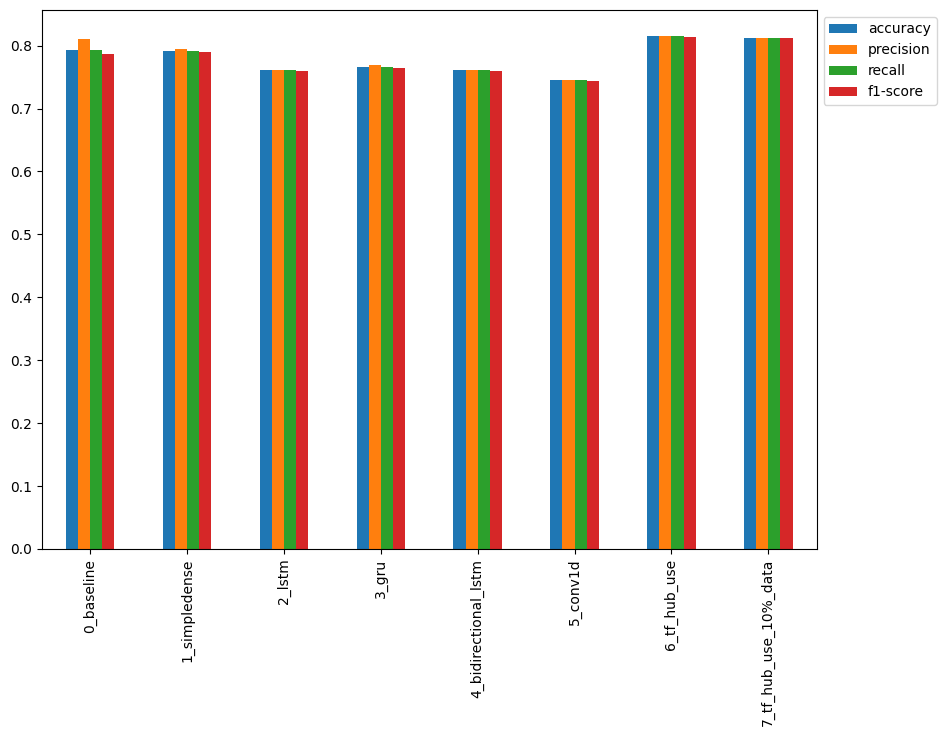

In [ ]:
results_df.plot(kind='bar', figsize=(10,7)).legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

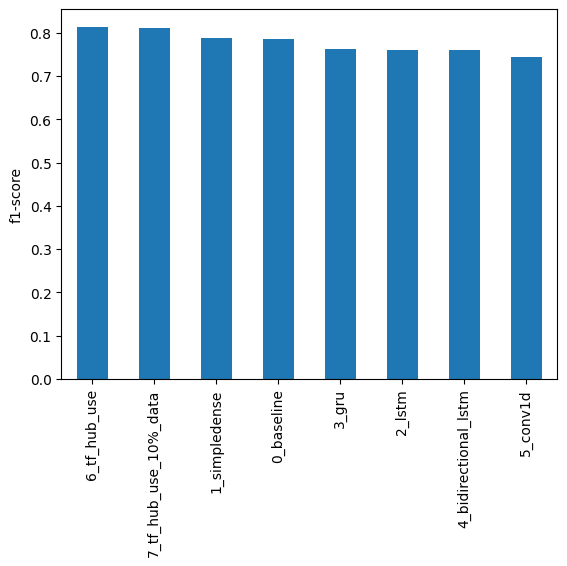

In [ ]:
## Sort result by f1 score
results_df.sort_values('f1-score', ascending=False)['f1-score'].plot(kind='bar', ylabel='f1-score')
plt.show()

In [ ]:
# upload records to tensorboard
!tensorboard dev upload --logdir ./models_logs/ \
    --name 'NLP Classification Experiment' \
    --description 'Experimented with a series of algorithms' \
    --one_shot

2023-06-30 18:04:57.598288: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/kk2iK9fBTA2C6gc3aBJeTw/

[2023-06-30T18:05:00] Started scanning logdir.
[2023-06-30T18:05:12] Total uploaded: 390 scalars, 0 tensors, 13 binary objects (6.9 MB)
[2023-06-30T18:05:12] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/kk2iK9fBTA2C6gc3aBJeTw/


Link to view results on tensorboard - https://tensorboard.dev/experiment/kk2iK9fBTA2C6gc3aBJeTw/

In [ ]:
## list all experiments
!tensorboard dev list

2023-06-30 18:07:56.418661: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
https://tensorboard.dev/experiment/kk2iK9fBTA2C6gc3aBJeTw/
	Name                 NLP Classification Experiment
	Description          Experimented with a series of algorithms
	Id                   kk2iK9fBTA2C6gc3aBJeTw
	Created              2023-06-30 18:05:00 (2 minutes ago)
	Updated              2023-06-30 18:05:12 (2 minutes ago)
	Runs                 26
	Tags                 5
	Scalars              390
	Tensor bytes         0
	Binary object bytes  7260701
https://tensorboard.dev/experiment/7DjKl0hwRLOQXY4bDg9XNw/
	Name                 NLP Classification Experiment
	Description          Experimented with a series of algorithms
	Id                   7DjKl0hwRLOQXY4bDg9XNw
	Created              2023-06-30 18:01:28 (6 minutes ago)
	Updated              2023-06-30 18:01:28 (6 minutes ago)
	Runs                 0
	Tags                 0
	Scalars              0
	Tens

In [ ]:
##delete any experiment
#!tensorboard dev delete --experiment_id N2DtNT0pRuqPhyxeK5Copw

# Save our model

There are two formats:
- HDF5
- SavedModel

**HDF5 format**

In [ ]:
# Save the model h5 fomat
model_6b.save("model_6.h5")

In [ ]:
# load the model (taks some time as its a bit heavy model)
loaded_model_6 = tf.keras.models.load_model('model_6.h5',
                                            custom_objects={'KerasLayer':hub.KerasLayer})

In [ ]:
# Evaluate the loaded model
loaded_model_6.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 11ms/step - loss: 0.4285 - accuracy: 0.8150


[0.42847415804862976, 0.8149606585502625]

In [ ]:
results_model_6b

[0.42847415804862976, 0.8149606585502625]

In [ ]:
model_6b_results

{'accuracy': 81.49606299212599,
 'precision': 0.8159654539826816,
 'recall': 0.8149606299212598,
 'f1-score': 0.8139016283708382}

**SavedModel format**

In [ ]:
# Save the model in saved model format
model_6b.save('model_6b_savedmodel_format')

In [ ]:
# load the model (taks some time as its a bit heavy model)
loaded_model_savedmodel_format = tf.keras.models.load_model('model_6b_savedmodel_format')

In [ ]:
# Evaluate the loaded model
loaded_model_savedmodel_format.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 13ms/step - loss: 0.4285 - accuracy: 0.8150


[0.42847415804862976, 0.8149606585502625]

In [ ]:
results_model_6b

[0.42847415804862976, 0.8149606585502625]

Saving the model to drive

In [ ]:
!du -sh '/content/model_6b_savedmodel_format'

989M	/content/model_6b_savedmodel_format
47M	/content/drive/MyDrive/ColabNotebooks/udemy_tf


In [ ]:
!cp -r /content/model_6b_savedmodel_format /content/drive/MyDrive/ColabNotebooks/udemy_tf

# Finding the most wrong predictions

Model driven exploratory approach

In [ ]:
#Download the pretrained model
! wget https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip

--2023-06-30 18:26:48--  https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.62.128, 172.253.115.128, 172.253.122.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.62.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960779165 (916M) [application/zip]
Saving to: ‘08_model_6_USE_feature_extractor.zip’

08_model_6_USE_feat 100%[===================>] 916.27M  28.3MB/s    in 32s     

2023-06-30 18:27:20 (28.8 MB/s) - ‘08_model_6_USE_feature_extractor.zip’ saved [960779165/960779165]



In [ ]:
unzip_data('08_model_6_USE_feature_extractor.zip')

In [ ]:
model_6_pretrained = tf.keras.models.load_model('08_model_6_USE_feature_extractor')

In [ ]:
model_6_pretrained.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 16ms/step - loss: 0.4272 - accuracy: 0.8163


[0.42723119258880615, 0.8162729740142822]

In [ ]:
model_6_pretrained_preds_probs = model_6_pretrained.predict(val_sentences)
model_6_pretrained_preds = tf.squeeze(tf.round(model_6_pretrained_preds_probs))
model_6_pretrained_preds[:10]

24/24 [==============================] - 1s 12ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
type(model_6_pretrained_preds)

tensorflow.python.framework.ops.EagerTensor

In [ ]:
val_df = pd.DataFrame({'text':val_sentences,
                       'target':val_labels,
                       'pred':tf.cast(model_6_pretrained_preds, tf.int32),
                       'pred_prob':tf.squeeze(model_6_pretrained_preds_probs)})

val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0,0.159757
1,FedEx no longer to transport bioterror germs i...,0,1,0.747162
2,Gunmen kill four in El Salvador bus attack: Su...,1,1,0.988749
3,@camilacabello97 Internally and externally scr...,1,0,0.196229
4,Radiation emergency #preparedness starts with ...,1,1,0.707808


In [ ]:
val_df['success']=val_df['target']==val_df['pred']

In [ ]:
val_df

,text,target,pred,pred_prob,success
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0,0.159757,True
1,FedEx no longer to transport bioterror germs i...,0,1,0.747162,False
2,Gunmen kill four in El Salvador bus attack: Su...,1,1,0.988749,True
3,@camilacabello97 Internally and externally scr...,1,0,0.196229,False
4,Radiation emergency #preparedness starts with ...,1,1,0.707808,True
...,...,...,...,...,...
757,That's the ultimate road to destruction,0,0,0.137074,True
758,@SetZorah dad why dont you claim me that mean ...,0,0,0.095865,True
759,FedEx will no longer transport bioterror patho...,0,1,0.876982,False
760,Crack in the path where I wiped out this morni...,0,1,0.612631,False


In [ ]:
most_wrong = val_df[val_df['success']==False].sort_values('pred_prob', ascending=False)

**False Positives**

In [ ]:
##target class - negative class, prediction positive, we have False Positives error
most_wrong.head(10)

,text,target,pred,pred_prob,success
31,? High Skies - Burning Buildings ? http://t.co...,0,1,0.910196,False
759,FedEx will no longer transport bioterror patho...,0,1,0.876982,False
628,@noah_anyname That's where the concentration c...,0,1,0.852300,False
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1,0.835455,False
251,@AshGhebranious civil rights continued in the ...,0,1,0.827213,False
393,@SonofLiberty357 all illuminated by the bright...,0,1,0.814816,False
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1,0.810840,False
49,@madonnamking RSPCA site multiple 7 story high...,0,1,0.803122,False
119,@freefromwolves GodsLove &amp; #thankU brother...,0,1,0.766901,False
344,Air Group is here to the rescue! We have 24/7 ...,0,1,0.766625,False


**False Negatives**

In [ ]:
##target class - positive, prediction negative, we have False Negatives
most_wrong.tail(10)

,text,target,pred,pred_prob,success
536,@DavidVonderhaar At least you were sincere ??,1,0,0.067303,False
408,@willienelson We need help! Horses will die!Pl...,1,0,0.055076,False
294,Lucas Duda is Ghost Rider. Not the Nic Cage ve...,1,0,0.054603,False
221,going to redo my nails and watch behind the sc...,1,0,0.054597,False
59,You can never escape me. Bullets don't harm me...,1,0,0.049637,False
411,@SoonerMagic_ I mean I'm a fan but I don't nee...,1,0,0.043918,False
233,I get to smoke my shit in peace,1,0,0.042087,False
38,Why are you deluged with low self-image? Take ...,1,0,0.038998,False
244,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0,0.038949,False
23,Ron &amp; Fez - Dave's High School Crush https...,1,0,0.037186,False


In [ ]:
# Viewing False Postive cases in details
for row in most_wrong[:10].itertuples():
    _, text, target, pred, pred_prob, _ = row
    print(f"Target: {target}, Pred: {pred}, Prob:{pred_prob}")
    print(f"Text:\n{text}\n")
    print("-----\n")

Target: 0, Pred: 1, Prob:0.9101957082748413
Text:
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

-----

Target: 0, Pred: 1, Prob:0.8769820332527161
Text:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

-----

Target: 0, Pred: 1, Prob:0.8523001670837402
Text:
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

-----

Target: 0, Pred: 1, Prob:0.835454523563385
Text:
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

-----

Target: 0, Pred: 1, Prob:0.8272131681442261
Text:
@AshGhebranious civil rights continued in the 60s. And what about trans-generational trauma? if anything we should listen to the Americans.

-----

Target: 0, Pred: 1, Prob:0.8148159384727478
Text:
@SonofLiberty357 all illuminated by the brightly burning buildings all around the town!

-----

Target: 0,

In [ ]:
# Viewing False Negative cases in details
for row in most_wrong[-10:].itertuples():
    _, text, target, pred, pred_prob, _ = row
    print(f"Target: {target}, Pred: {pred}, Prob:{pred_prob}")
    print(f"Text:\n{text}\n")
    print("-----\n")

Target: 1, Pred: 0, Prob:0.06730345636606216
Text:
@DavidVonderhaar At least you were sincere ??

-----

Target: 1, Pred: 0, Prob:0.05507584661245346
Text:
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

-----

Target: 1, Pred: 0, Prob:0.05460338667035103
Text:
Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets

-----

Target: 1, Pred: 0, Prob:0.054596997797489166
Text:
going to redo my nails and watch behind the scenes of desolation of smaug ayyy

-----

Target: 1, Pred: 0, Prob:0.04963729530572891
Text:
You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

-----

Target: 1, Pred: 0, Prob:0.04391849786043167
Text:
@SoonerMagic_ I mean I'm a fan but I don't need a girl sounding off like a damn siren

-----

Target: 1, Pred: 0, Prob:0.0420868396759033

In [ ]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


#Make prediction on test data

In [ ]:
test_sentences = test_df['text'].to_numpy()
test_samples = random.sample(test_sentences, 10)

for sample in test_samples:
    preds_probs = model_6_pretrained.predict(sample)
    preds = tf.squeeze(tf.round(preds_probs))
    print(f"Pred: {preds}, Prob:{preds_probs}")
    print(f"Text:\n{sample}\n")
    print("-----\n")


# Predicting on real latest tweets

# Speed / Score tradeoff

In [ ]:
#lets make afunction to measure time taken to make prediction
import time

def pred_timer(model, samples):
    """
    Times how long a model takes to make prediction
    """
    start_time = time.perf_counter()
    model.predict(samples)
    end_time = time.perf_counter()
    total_time = end_time - start_time
    time_per_pred = total_time/ len(samples)
    return total_time, time_per_pred

In [ ]:
#calculate time for model_6_pretrained
total_time_model_6, time_per_pred_model_6 = pred_timer(model=model_6_pretrained,
                                                       samples=val_sentences)

total_time_model_6, time_per_pred_model_6

In [ ]:
#calculate time for baseline model_0
total_time_model_baseline, time_per_pred_model_baseline = pred_timer(model=model_0,
                                                       samples=val_sentences)

total_time_model_baseline, time_per_pred_model_baseline

In [ ]:
# Get results for model_6_pretrained
model_6_pretrained_results = calculate_results(val_labels, model_6_pretrained_preds)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.scatter(time_per_pred_model_baseline, model_0_results['f1-score'], label='baseline')
plt.scatter(time_per_pred_model_6, model_6_pretrained_results['f1-score'], label='baseline')
plt.legend()
plt.title('F1 score versus Time per prediction')
plt.xlabel('time_per_prediction')
plt.ylabel('f1-score')
plt.show()